In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("zameen-updated.csv")
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
df1.shape

(168446, 20)

In [5]:
df1.groupby('Area Type')['Area Type'].agg('count')

Area Type
Kanal     30677
Marla    137769
Name: Area Type, dtype: int64

In [6]:
df2 = df1.drop(['property_id','location_id','page_url',
                'province_name','latitude','longitude',
                'area','purpose','date_added','agent','agency'],axis = 'columns')
df2.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category
0,Flat,10000000,G-10,Islamabad,2,2,Marla,4.0,0-5 Marla
1,Flat,6900000,E-11,Islamabad,3,3,Marla,5.6,5-10 Marla
2,House,16500000,G-15,Islamabad,6,5,Marla,8.0,5-10 Marla
3,House,43500000,Bani Gala,Islamabad,4,4,Kanal,2.0,1-5 Kanal
4,House,7000000,DHA Defence,Islamabad,3,3,Marla,8.0,5-10 Marla


In [7]:
df2.groupby('city')['city'].agg('count')

city
Faisalabad     8133
Islamabad     37426
Karachi       60484
Lahore        41427
Rawalpindi    20976
Name: city, dtype: int64

In [8]:
df2.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
bedrooms         0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

In [9]:
df2['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [14]:
df2[df2['city']=='Karachi'].shape

(20976, 9)

In [15]:
df2[df2.bedrooms>20]

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category
120075,House,1300000,Satellite Town,Rawalpindi,0,28,Kanal,2.0,1-5 Kanal
129557,House,960000000,Gulberg,Lahore,0,25,Kanal,8.0,5-10 Kanal
130132,House,300000,G-14,Islamabad,0,21,Kanal,1.2,1-5 Kanal
139738,House,1300000,Satellite Town,Rawalpindi,0,28,Kanal,2.0,1-5 Kanal
140891,House,2500000,North Nazimabad,Karachi,0,68,Kanal,6.6,5-10 Kanal
144418,House,550000,Jamshed Town,Karachi,0,25,Kanal,3.0,1-5 Kanal
144837,House,80000000,Gulraiz Housing Scheme,Rawalpindi,0,27,Kanal,3.0,1-5 Kanal
152009,House,900000,Gulshan-e-Iqbal Town,Karachi,0,25,Kanal,3.0,1-5 Kanal
164716,House,1300000,Satellite Town,Rawalpindi,0,28,Kanal,2.0,1-5 Kanal
164717,House,1300000,Satellite Town,Rawalpindi,0,28,Kanal,2.0,1-5 Kanal


In [16]:
df2['Area Type'].loc[df2['Area Size']==4][0]

'Marla'

In [17]:
def to_sqft(size, typeofarea):
    
    if typeofarea == "Marla":
        return float(size) * 272.251
    elif typeofarea == "Kanal":
        return float(size) * 5445

In [18]:
df2['total_sqft'] = df2.apply(lambda _: '', axis=1)

In [19]:
df2.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft
0,Flat,10000000,G-10,Islamabad,2,2,Marla,4.0,0-5 Marla,
1,Flat,6900000,E-11,Islamabad,3,3,Marla,5.6,5-10 Marla,
2,House,16500000,G-15,Islamabad,6,5,Marla,8.0,5-10 Marla,
3,House,43500000,Bani Gala,Islamabad,4,4,Kanal,2.0,1-5 Kanal,
4,House,7000000,DHA Defence,Islamabad,3,3,Marla,8.0,5-10 Marla,


In [21]:
for i in range(0, len(df2['Area Size'])):
    mysize=df2['Area Size'][i]
    typeofarea = df2['Area Type'][i]
    df2['total_sqft'][i] = round(to_sqft(mysize, typeofarea))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
df2.tail()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft
168441,House,26500000,Gadap Town,Karachi,0,6,Marla,9.6,5-10 Marla,2614
168442,House,12500000,Gadap Town,Karachi,0,3,Marla,8.0,5-10 Marla,2178
168443,House,27000000,Gadap Town,Karachi,0,6,Marla,9.6,5-10 Marla,2614
168444,House,11000000,Gadap Town,Karachi,0,3,Marla,7.8,5-10 Marla,2124
168445,House,9000000,Bahria Town Karachi,Karachi,3,3,Marla,9.4,5-10 Marla,2559


In [23]:
df2.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft
0,Flat,10000000,G-10,Islamabad,2,2,Marla,4.0,0-5 Marla,1089
1,Flat,6900000,E-11,Islamabad,3,3,Marla,5.6,5-10 Marla,1525
2,House,16500000,G-15,Islamabad,6,5,Marla,8.0,5-10 Marla,2178
3,House,43500000,Bani Gala,Islamabad,4,4,Kanal,2.0,1-5 Kanal,10890
4,House,7000000,DHA Defence,Islamabad,3,3,Marla,8.0,5-10 Marla,2178


In [24]:
df3 = df2.copy()


In [25]:
df3 = df3.loc[df3['total_sqft'] > 0]

In [26]:
df3['price_per_sqft'] = df3['price']/df3['total_sqft']
df3.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,price_per_sqft
0,Flat,10000000,G-10,Islamabad,2,2,Marla,4.0,0-5 Marla,1089,9182.736455
1,Flat,6900000,E-11,Islamabad,3,3,Marla,5.6,5-10 Marla,1525,4524.590164
2,House,16500000,G-15,Islamabad,6,5,Marla,8.0,5-10 Marla,2178,7575.757576
3,House,43500000,Bani Gala,Islamabad,4,4,Kanal,2.0,1-5 Kanal,10890,3994.490358
4,House,7000000,DHA Defence,Islamabad,3,3,Marla,8.0,5-10 Marla,2178,3213.957759


In [28]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
DHA Defence                   22046
Bahria Town Karachi            8548
Bahria Town Rawalpindi         8502
Bahria Town                    6427
Gulistan-e-Jauhar              5877
                              ...  
Saadi Park                        1
Saadat Avenue                     1
Ryaz ul Jannah                    1
Gulshan-E-Faisal                  1
Green Hills Housing Scheme        1
Name: location, Length: 1509, dtype: int64

In [29]:
#threshold for locations less than 10 points above
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Race Course                     10
Nishtar Road (Lawrence Road)    10
Misri Shah                      10
Pakki Thatti                    10
Mall Road                       10
                                ..
Saadi Park                       1
Saadat Avenue                    1
Ryaz ul Jannah                   1
Gulshan-E-Faisal                 1
Green Hills Housing Scheme       1
Name: location, Length: 825, dtype: int64

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

685

In [31]:
df3.head(10)

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,price_per_sqft
0,Flat,10000000,G-10,Islamabad,2,2,Marla,4.0,0-5 Marla,1089,9182.736455
1,Flat,6900000,E-11,Islamabad,3,3,Marla,5.6,5-10 Marla,1525,4524.590164
2,House,16500000,G-15,Islamabad,6,5,Marla,8.0,5-10 Marla,2178,7575.757576
3,House,43500000,Bani Gala,Islamabad,4,4,Kanal,2.0,1-5 Kanal,10890,3994.490358
4,House,7000000,DHA Defence,Islamabad,3,3,Marla,8.0,5-10 Marla,2178,3213.957759
5,House,34500000,Ghauri Town,Islamabad,8,8,Kanal,1.6,1-5 Kanal,8712,3960.055096
6,House,27000000,Korang Town,Islamabad,8,8,Kanal,1.0,1-5 Kanal,5445,4958.677686
7,Flat,7800000,E-11,Islamabad,2,2,Marla,6.2,5-10 Marla,1688,4620.853081
8,House,50000000,DHA Defence,Islamabad,7,7,Kanal,1.0,1-5 Kanal,5445,9182.736455
9,Penthouse,40000000,F-11,Islamabad,5,5,Kanal,1.0,1-5 Kanal,5445,7346.189164


In [32]:
df4 = df3[df3['bedrooms']>0]

In [33]:
df4.shape

(145732, 11)

In [34]:
df5 = df4[~(df4.total_sqft/df4.bedrooms<300)]

In [35]:
df5.shape

(131776, 11)

In [36]:
df5.price_per_sqft.std()

5593.121485488846

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(92784, 11)

In [38]:
df6['bedrooms'].unique()

array([ 2,  8,  3,  4,  1, 10,  5,  6, 11,  7,  9, 15, 14, 12, 18, 21, 27,
       28], dtype=int64)

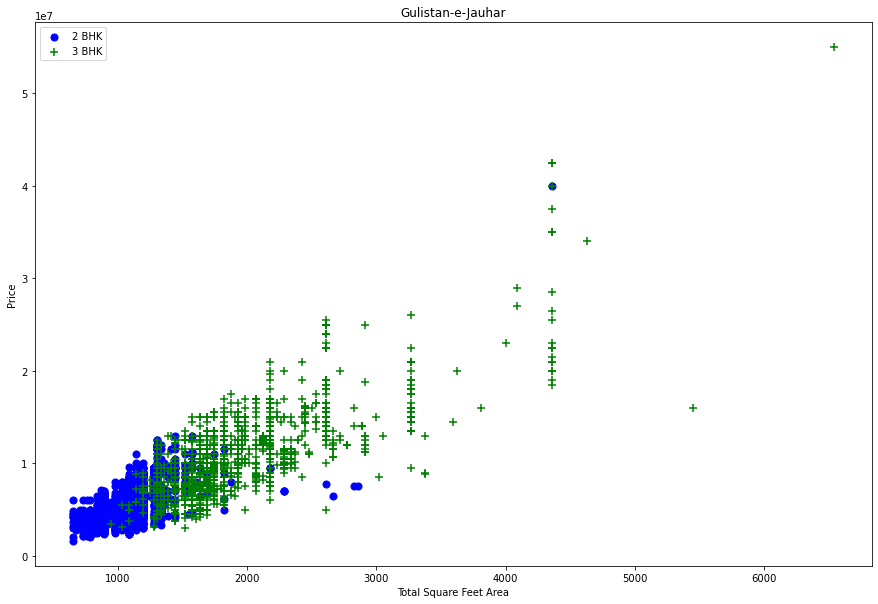

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color="blue",label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6, "Gulistan-e-Jauhar")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

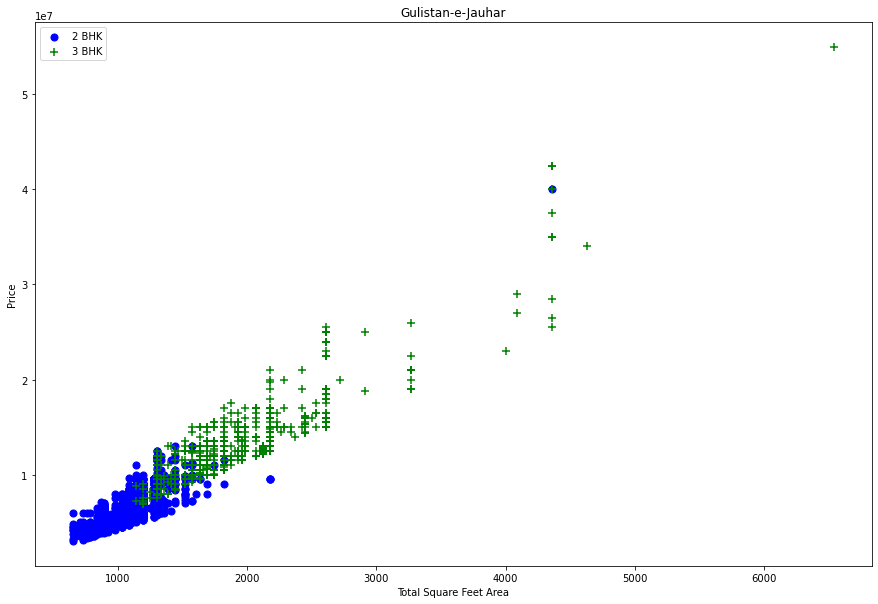

In [41]:
plot_scatter_chart(df7, "Gulistan-e-Jauhar")

Text(0, 0.5, 'Count')

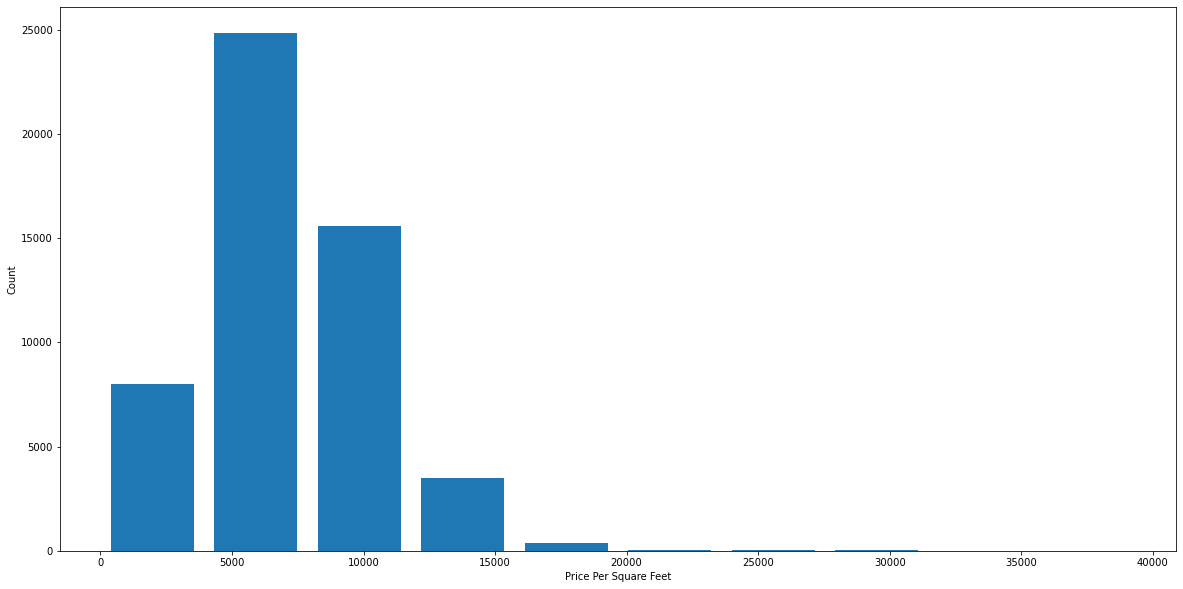

In [42]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [43]:
df7.baths.unique()

array([ 2,  8,  1,  0,  3,  6,  5,  7, 10,  4,  9, 13, 14, 12, 11],
      dtype=int64)

In [44]:
df7[df7.baths>10]

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,price_per_sqft
27716,House,300000,D-12,Islamabad,13,10,Kanal,1.2,1-5 Kanal,6534,45.913682
48414,House,650000,F-8,Islamabad,14,14,Kanal,4.0,1-5 Kanal,21780,29.843893
53323,House,230000,G-14,Islamabad,12,10,Kanal,1.2,1-5 Kanal,6534,35.20049
53326,House,250000,G-14,Islamabad,14,10,Kanal,1.5,1-5 Kanal,8168,30.607248
87147,House,125000000,Shadman 2,Lahore,11,11,Kanal,2.0,1-5 Kanal,10890,11478.420569


Text(0, 0.5, 'Count')

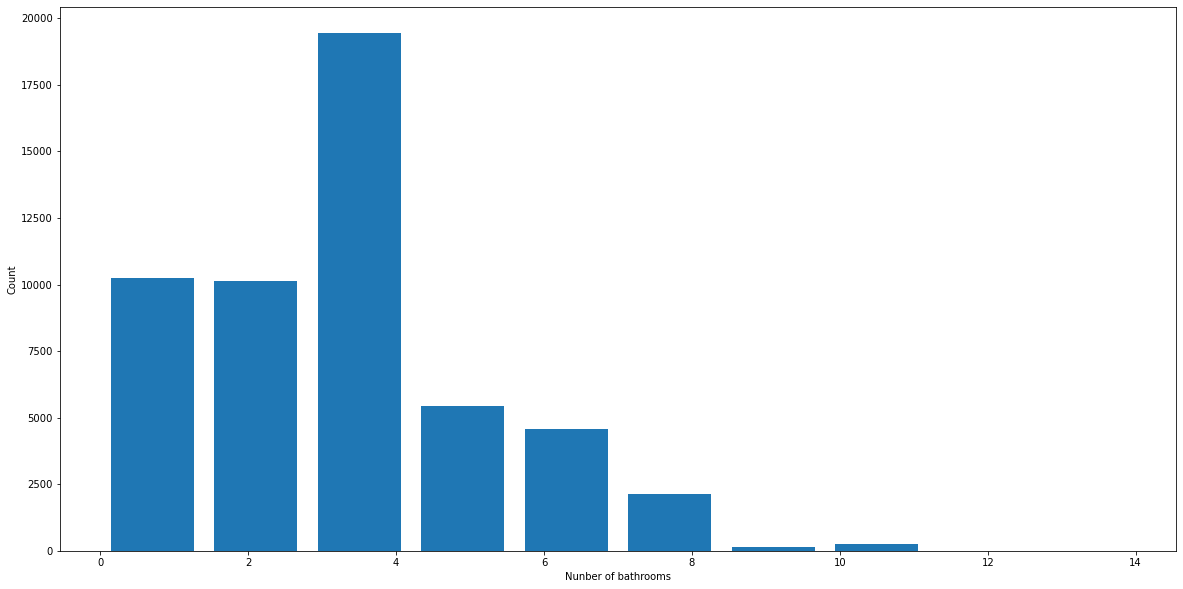

In [45]:
plt.hist(df7.baths, rwidth=0.8)
plt.xlabel("Nunber of bathrooms")
plt.ylabel("Count")


In [46]:
df7[df7.baths>df7.bedrooms+2]

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,price_per_sqft
3117,House,8000000,Ashraf Colony,Rawalpindi,7,4,Marla,7.0,5-10 Marla,1906,4197.271773
3813,Flat,14000000,Askari,Lahore,7,3,Marla,10.0,5-10 Marla,2723,5141.388175
4074,Flat,32000,Askari 1,Rawalpindi,7,3,Marla,10.0,5-10 Marla,2723,11.751744
4515,House,15000000,B-17,Islamabad,7,4,Marla,8.0,5-10 Marla,2178,6887.052342
4517,House,13000000,B-17,Islamabad,7,4,Marla,8.0,5-10 Marla,2178,5968.778696
...,...,...,...,...,...,...,...,...,...,...,...
92027,House,17500000,other,Lahore,8,5,Marla,10.0,5-10 Marla,2723,6426.735219
92039,House,8600000,other,Lahore,7,4,Marla,5.0,0-5 Marla,1361,6318.883174
92110,House,17000000,other,Islamabad,7,4,Marla,11.2,10-15 Marla,3049,5575.598557
92386,House,35000000,other,Lahore,9,6,Kanal,1.0,1-5 Kanal,5445,6427.915519


In [47]:
df8 = df7[df7.baths<df7.bedrooms+2]
df8.shape

(50436, 11)

In [48]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft
0,Flat,90000,7th Avenue,Islamabad,2,2,Marla,6.4,5-10 Marla,1742
1,House,1000000,7th Avenue,Islamabad,8,8,Kanal,2.0,1-5 Kanal,10890
2,Room,17000,7th Avenue,Islamabad,1,2,Marla,5.0,0-5 Marla,1361
3,Room,16000,7th Avenue,Islamabad,0,2,Marla,5.0,0-5 Marla,1361
4,Upper Portion,20000,7th Avenue,Islamabad,2,2,Marla,5.0,0-5 Marla,1361


In [87]:
import seaborn as sns
df9[df9['city']=='Karachi'].location.unique()

array(['ASF Tower', 'Abid Town', 'Abul Hassan Isphani Road', 'Airport',
       'Aisha Manzil', 'Al-Hilal Society', 'Amir Khusro', 'Anda Mor Road',
       'Azam Town', 'Bagh-e-Korangi', 'Bahria Town Karachi',
       'Baldia Town', 'Baloch Colony', 'Bath Island', 'Bin Qasim Town',
       'Cantt', 'Civil Lines', 'Clifton', 'Cosmopolitan Society',
       'DHA City Karachi', 'DHA Defence', 'Dastgir Colony',
       'Defence View Society', 'Delhi Colony', 'Diamond City',
       'Etawa Society', 'Falaknaz Presidency', 'Falcon Complex Faisal',
       'Fazaia Housing Scheme', 'Federal B Area', 'Frere Town',
       'Gadap Town', 'Garden West', 'Gizri', 'Gizri Road', 'Golimar',
       'Gulberg Town', 'Gulistan-e-Jauhar', 'Gulshan-e-Iqbal Town',
       'Guru Mandir Chorangi', 'Hassan Goth', 'Hill Park', 'Jamshed Road',
       'Jamshed Town', 'Jinnah Avenue', 'KDA Scheme 1',
       'Kamran Chowrangi', 'Karachi Motorway', 'Kashmir Colony',
       'Kashmir Road', 'Kemari Town', 'Khalid Bin Walid Road'

<AxesSubplot:xlabel='city', ylabel='count'>

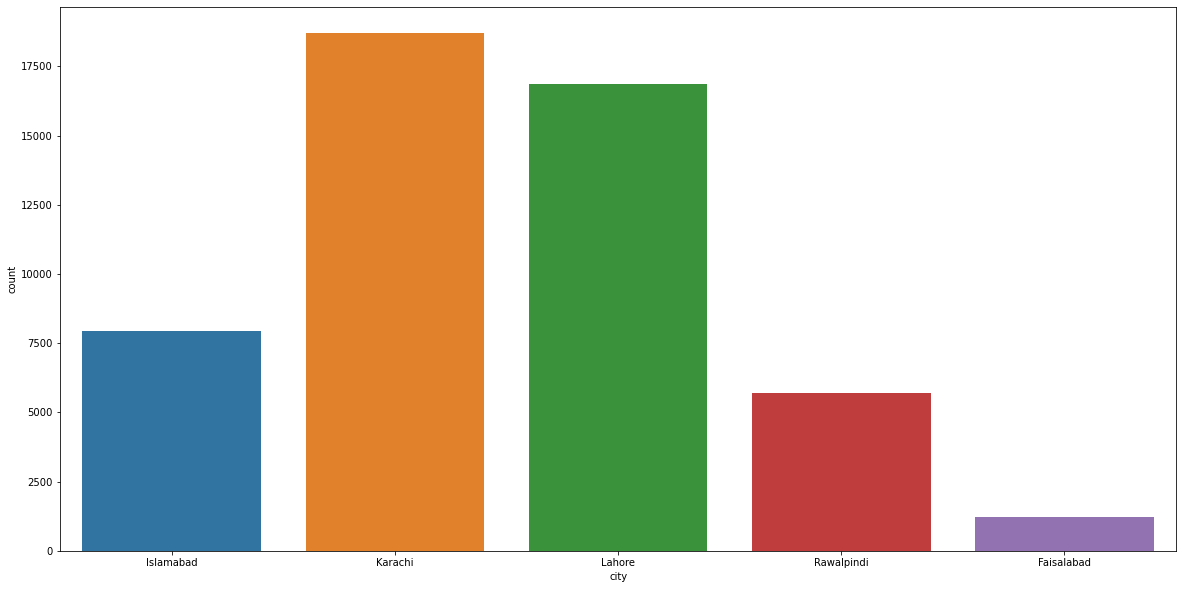

In [79]:
sns.countplot(x='city',data=df9)

In [49]:
Karachi_df = df9.loc[df9['city'] == 'Karachi']

In [51]:
Karachi_df.shape

(18707, 10)

In [52]:
dummies = pd.get_dummies(Karachi_df.location)
dummies.head(3)

,ASF Tower,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,Azam Town,Bagh-e-Korangi,...,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Stadium Road,Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama,other
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 = pd.concat([Karachi_df, dummies.drop('other', axis='columns')],axis='columns')

In [54]:
df11.head()

,property_type,price,location,city,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Stadium Road,Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
52,Flat,5400000,ASF Tower,Karachi,2,2,Marla,4.7,0-5 Marla,1280,...,0,0,0,0,0,0,0,0,0,0
53,Flat,4300000,ASF Tower,Karachi,3,3,Marla,6.9,5-10 Marla,1879,...,0,0,0,0,0,0,0,0,0,0
54,Flat,5500000,ASF Tower,Karachi,5,4,Marla,8.9,5-10 Marla,2423,...,0,0,0,0,0,0,0,0,0,0
55,Flat,7900000,ASF Tower,Karachi,3,3,Marla,6.9,5-10 Marla,1879,...,0,0,0,0,0,0,0,0,0,0
56,Flat,5300000,ASF Tower,Karachi,3,3,Marla,6.0,5-10 Marla,1634,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12 = df11.drop(['location', 'city'],axis='columns')
df12.head()

,property_type,price,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,ASF Tower,Abid Town,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Stadium Road,Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
52,Flat,5400000,2,2,Marla,4.7,0-5 Marla,1280,1,0,...,0,0,0,0,0,0,0,0,0,0
53,Flat,4300000,3,3,Marla,6.9,5-10 Marla,1879,1,0,...,0,0,0,0,0,0,0,0,0,0
54,Flat,5500000,5,4,Marla,8.9,5-10 Marla,2423,1,0,...,0,0,0,0,0,0,0,0,0,0
55,Flat,7900000,3,3,Marla,6.9,5-10 Marla,1879,1,0,...,0,0,0,0,0,0,0,0,0,0
56,Flat,5300000,3,3,Marla,6.0,5-10 Marla,1634,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df14 = df12.drop('property_type', axis='columns')

In [58]:
df14.head()

,price,baths,bedrooms,Area Type,Area Size,Area Category,total_sqft,ASF Tower,Abid Town,Abul Hassan Isphani Road,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Stadium Road,Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
52,5400000,2,2,Marla,4.7,0-5 Marla,1280,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,4300000,3,3,Marla,6.9,5-10 Marla,1879,1,0,0,...,0,0,0,0,0,0,0,0,0,0
54,5500000,5,4,Marla,8.9,5-10 Marla,2423,1,0,0,...,0,0,0,0,0,0,0,0,0,0
55,7900000,3,3,Marla,6.9,5-10 Marla,1879,1,0,0,...,0,0,0,0,0,0,0,0,0,0
56,5300000,3,3,Marla,6.0,5-10 Marla,1634,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df15 = df14.drop(['Area Type','Area Size','Area Category'],axis='columns')


df15['price'].head()

52    5400000
53    4300000
54    5500000
55    7900000
56    5300000
Name: price, dtype: int64

In [60]:
X = df15.drop('price',axis='columns')
X.head()

,baths,bedrooms,total_sqft,ASF Tower,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Stadium Road,Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
52,2,2,1280,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,3,3,1879,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,5,4,2423,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,3,3,1879,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,3,3,1634,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df15.price
y.head()

52    5400000
53    4300000
54    5500000
55    7900000
56    5300000
Name: price, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.819821083179787

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81494215, 0.87308085, 0.75752502, 0.76942706, 0.80243333])

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.702639482115553e+17, tolerance: 1022617792308476.1
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.463887221362095e+17, tolerance: 1010495594058778.5
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.717128175744813e+17, tolerance: 1041434544096931.5
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

,model,best_score,best_params
0,linear_regression,0.803482,{'normalize': False}
1,lasso,0.803482,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.944925,"{'criterion': 'mse', 'splitter': 'random'}"


In [66]:
dt_clf = DecisionTreeRegressor(criterion = 'mse', splitter='random')
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test,y_test)

0.8705941665517427

In [67]:
def predict_price(location,sqft,bath,bhk):
    print(location)
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return dt_clf.predict([x])[0]

In [69]:
predict_price('Al-Hilal Society', 1000, 3,5)

Al-Hilal Society


4200000.0

In [73]:
predict_price('Abid Town', 2000, 6,7)


Abid Town


1500000.0

In [77]:
predict_price('Stadium Road', 9000, 4,7)

Stadium Road


8200000.0

In [89]:
import pickle
with open('karachi_home_prices_model.pickle','wb') as f:
    pickle.dump(dt_clf,f)

In [90]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))